In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.dates as mdates
import datetime as dt
# set random seed
SEED = 321
np.random.seed(SEED)

!pip install holidays
import holidays
from holidays import country_holidays

In [2]:
# get list of files from folder
crime_files = sorted(glob.glob("Data/Chicago/"+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

ID                    Date        Primary Type  \
0       1311123  01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
1       1318099  01/01/2001 01:00:00 AM             BATTERY   
2       1309918  01/01/2001 01:00:00 AM               THEFT   
3       1323691  01/01/2001 01:00:00 AM   WEAPONS VIOLATION   
4       1326041  01/01/2001 01:00:00 AM             BATTERY   
...         ...                     ...                 ...   
71724  13047140  04/19/2023 12:50:00 PM             BATTERY   
71725  13047255  04/19/2023 12:51:00 PM  DECEPTIVE PRACTICE   
71726  13047517  04/19/2023 12:55:00 PM       OTHER OFFENSE   
71727  13047228  04/19/2023 12:56:00 PM       OTHER OFFENSE   
71728  13047149  04/19/2023 12:56:00 PM             BATTERY   

                    Description         Location Description  Arrest  \
0                    TO VEHICLE                       STREET   False   
1                        SIMPLE      RESIDENCE PORCH/HALLWAY   False   
2                $500 AND UNDER          TAVERN/LIQUOR STORE   False   
3      UNLAWFUL POSS OF HANDGUN                       STREET   False   
4                        SIMPLE                    RESIDENCE   False   
...                         ...                          ...     ...   
71724                    SIMPLE        TAVERN / LIQUOR STORE   False   
71725            COMPUTER FRAUD                    RESIDENCE   False   
71726          TELEPHONE THREAT  HOSPITAL BUILDING / GROUNDS   False   
71727   OTHER WEAPONS VIOLATION                     SIDEWALK    True   
71728   DOMESTIC BATTERY SIMPLE                    RESIDENCE   False   

       Domestic  Beat  District  Ward   Latitude  Longitude  
0         False  1223      12.0   NaN  41.854014 -87.681909  
1          True   214       2.0   NaN  41.819538 -87.620020  
2         False  1924      19.0   NaN  41.940001 -87.654258  
3         False  1135      11.0   NaN  41.866694 -87.688513  
4         False  1624      16.0   NaN  41.957850 -87.749185  
...         ...   ...       ...   ...        ...        ...  
71724     False   725       7.0  16.0  41.768560 -87.663251  
71725     False  2514      25.0  31.0  41.932114 -87.762588  
71726      True   332       3.0   5.0  41.769688 -87.587222  
71727     False  2534      25.0  37.0  41.904462 -87.727043  
71728      True   731       7.0   6.0  41.764903 -87.632198  

[7783202 rows x 12 columns]

In [3]:
eda_df=df.copy()
eda_df.head()

ID                    Date       Primary Type  \
0  1311123  01/01/2001 01:00:00 AM    CRIMINAL DAMAGE   
1  1318099  01/01/2001 01:00:00 AM            BATTERY   
2  1309918  01/01/2001 01:00:00 AM              THEFT   
3  1323691  01/01/2001 01:00:00 AM  WEAPONS VIOLATION   
4  1326041  01/01/2001 01:00:00 AM            BATTERY   

                Description     Location Description  Arrest  Domestic  Beat  \
0                TO VEHICLE                   STREET   False     False  1223   
1                    SIMPLE  RESIDENCE PORCH/HALLWAY   False      True   214   
2            $500 AND UNDER      TAVERN/LIQUOR STORE   False     False  1924   
3  UNLAWFUL POSS OF HANDGUN                   STREET   False     False  1135   
4                    SIMPLE                RESIDENCE   False     False  1624   

   District  Ward   Latitude  Longitude  
0      12.0   NaN  41.854014 -87.681909  
1       2.0   NaN  41.819538 -87.620020  
2      19.0   NaN  41.940001 -87.654258  
3      11.0   NaN  41.866694 -87.688513  
4      16.0   NaN  41.957850 -87.749185

In [7]:
#Dropping NA rows
eda_df = eda_df.dropna(subset = ["Latitude", "Longitude"])
(eda_df.isna().sum()/len(df)) * 100

ID                      0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.084759
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000604
Ward                    7.780782
Latitude                0.000000
Longitude               0.000000
Date-Original           0.000000
dtype: float64

In [8]:
## saving a copy of original datetime column as datetime-original
eda_df['Date-Original'] = eda_df['Date'].copy()
eda_df

KeyError: 'Date'

In [6]:
eda_df = eda_df.set_index("Date")
eda_df.head()

ID       Primary Type               Description  \
Date                                                                           
01/01/2001 01:00:00 AM  1311123    CRIMINAL DAMAGE                TO VEHICLE   
01/01/2001 01:00:00 AM  1318099            BATTERY                    SIMPLE   
01/01/2001 01:00:00 AM  1309918              THEFT            $500 AND UNDER   
01/01/2001 01:00:00 AM  1323691  WEAPONS VIOLATION  UNLAWFUL POSS OF HANDGUN   
01/01/2001 01:00:00 AM  1326041            BATTERY                    SIMPLE   

                           Location Description  Arrest  Domestic  Beat  \
Date                                                                      
01/01/2001 01:00:00 AM                   STREET   False     False  1223   
01/01/2001 01:00:00 AM  RESIDENCE PORCH/HALLWAY   False      True   214   
01/01/2001 01:00:00 AM      TAVERN/LIQUOR STORE   False     False  1924   
01/01/2001 01:00:00 AM                   STREET   False     False  1135   
01/01/2001 01:00:00 AM                RESIDENCE   False     False  1624   

                        District  Ward   Latitude  Longitude  \
Date                                                           
01/01/2001 01:00:00 AM      12.0   NaN  41.854014 -87.681909   
01/01/2001 01:00:00 AM       2.0   NaN  41.819538 -87.620020   
01/01/2001 01:00:00 AM      19.0   NaN  41.940001 -87.654258   
01/01/2001 01:00:00 AM      11.0   NaN  41.866694 -87.688513   
01/01/2001 01:00:00 AM      16.0   NaN  41.957850 -87.749185   

                                 Date-Original  
Date                                            
01/01/2001 01:00:00 AM  01/01/2001 01:00:00 AM  
01/01/2001 01:00:00 AM  01/01/2001 01:00:00 AM  
01/01/2001 01:00:00 AM  01/01/2001 01:00:00 AM  
01/01/2001 01:00:00 AM  01/01/2001 01:00:00 AM  
01/01/2001 01:00:00 AM  01/01/2001 01:00:00 AM

In [8]:
eda_df["Primary Type"].value_counts().sort_values(ascending = False)

THEFT                                1620013
BATTERY                              1416565
CRIMINAL DAMAGE                       882514
NARCOTICS                             735175
ASSAULT                               504993
OTHER OFFENSE                         479299
BURGLARY                              422672
MOTOR VEHICLE THEFT                   371913
DECEPTIVE PRACTICE                    320416
ROBBERY                               290786
CRIMINAL TRESPASS                     213238
WEAPONS VIOLATION                     105843
PROSTITUTION                           69171
PUBLIC PEACE VIOLATION                 52071
OFFENSE INVOLVING CHILDREN             51970
SEX OFFENSE                            28815
CRIM SEXUAL ASSAULT                    26142
INTERFERENCE WITH PUBLIC OFFICER       18317
LIQUOR LAW VIOLATION                   14760
GAMBLING                               14520
ARSON                                  13158
HOMICIDE                               12543
KIDNAPPING

In [10]:
corrections = {"NON - CRIMINAL": "NON-CRIMINAL",
               "CRIM SEXUAL ASSAULT": "CRIMINAL SEXUAL ASSAULT"}
eda_df.replace(corrections, inplace = True)
#Cleaning Primary Type
eda_df["Primary Type"].value_counts().sort_values(ascending = False)

THEFT                                1620013
BATTERY                              1416565
CRIMINAL DAMAGE                       882514
NARCOTICS                             735175
ASSAULT                               504993
OTHER OFFENSE                         479299
BURGLARY                              422672
MOTOR VEHICLE THEFT                   371913
DECEPTIVE PRACTICE                    320416
ROBBERY                               290786
CRIMINAL TRESPASS                     213238
WEAPONS VIOLATION                     105843
PROSTITUTION                           69171
PUBLIC PEACE VIOLATION                 52071
OFFENSE INVOLVING CHILDREN             51970
CRIMINAL SEXUAL ASSAULT                32022
SEX OFFENSE                            28815
INTERFERENCE WITH PUBLIC OFFICER       18317
LIQUOR LAW VIOLATION                   14760
GAMBLING                               14520
ARSON                                  13158
HOMICIDE                               12543
KIDNAPPING

In [16]:
eda_df["Date-Original"] = pd.to_datetime(eda_df["Date-Original"])
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7689771 entries, 2001-01-01 01:00:00 to 2023-04-19 12:56:00
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Date-Original         datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 660.0+ MB


In [17]:
## feature engineering for dates
eda_df['year'] = eda_df['Date-Original'].dt.year
eda_df['month'] = eda_df['Date-Original'].dt.month_name()
eda_df['day of month'] = eda_df['Date-Original'].dt.day
eda_df['day of week'] = eda_df['Date-Original'].dt.day_name()
eda_df['hour'] = eda_df['Date-Original'].dt.hour
eda_df.head()

ID       Primary Type               Description  \
Date                                                                        
2001-01-01 01:00:00  1311123    CRIMINAL DAMAGE                TO VEHICLE   
2001-01-01 01:00:00  1318099            BATTERY                    SIMPLE   
2001-01-01 01:00:00  1309918              THEFT            $500 AND UNDER   
2001-01-01 01:00:00  1323691  WEAPONS VIOLATION  UNLAWFUL POSS OF HANDGUN   
2001-01-01 01:00:00  1326041            BATTERY                    SIMPLE   

                        Location Description  Arrest  Domestic  Beat  \
Date                                                                   
2001-01-01 01:00:00                   STREET   False     False  1223   
2001-01-01 01:00:00  RESIDENCE PORCH/HALLWAY   False      True   214   
2001-01-01 01:00:00      TAVERN/LIQUOR STORE   False     False  1924   
2001-01-01 01:00:00                   STREET   False     False  1135   
2001-01-01 01:00:00                RESIDENCE   False     False  1624   

                     District  Ward   Latitude  Longitude       Date-Original  \
Date                                                                            
2001-01-01 01:00:00      12.0   NaN  41.854014 -87.681909 2001-01-01 01:00:00   
2001-01-01 01:00:00       2.0   NaN  41.819538 -87.620020 2001-01-01 01:00:00   
2001-01-01 01:00:00      19.0   NaN  41.940001 -87.654258 2001-01-01 01:00:00   
2001-01-01 01:00:00      11.0   NaN  41.866694 -87.688513 2001-01-01 01:00:00   
2001-01-01 01:00:00      16.0   NaN  41.957850 -87.749185 2001-01-01 01:00:00   

                     year    month  day of month day of week  hour  
Date                                                                
2001-01-01 01:00:00  2001  January             1      Monday     1  
2001-01-01 01:00:00  2001  January             1      Monday     1  
2001-01-01 01:00:00  2001  January             1      Monday     1  
2001-01-01 01:00:00  2001  January             1      Monday     1  
2001-01-01 01:00:00  2001  January             1      Monday     1

In [21]:
eda_df=eda_df.drop(columns='Ward')

In [23]:
eda_df.head(10)

ID                Date                Primary Type  \
0  1311123 2001-01-01 01:00:00             CRIMINAL DAMAGE   
1  1318099 2001-01-01 01:00:00                     BATTERY   
2  1309918 2001-01-01 01:00:00                       THEFT   
3  1323691 2001-01-01 01:00:00           WEAPONS VIOLATION   
4  1326041 2001-01-01 01:00:00                     BATTERY   
5  5462733 2001-01-01 01:00:00  OFFENSE INVOLVING CHILDREN   
6  1311933 2001-01-01 01:00:00                 SEX OFFENSE   
7  1310610 2001-01-01 01:00:00             CRIMINAL DAMAGE   
8  1310586 2001-01-01 01:00:00                       THEFT   
9  1312658 2001-01-01 01:00:00                     BATTERY   

                     Description     Location Description  Arrest  Domestic  \
0                     TO VEHICLE                   STREET   False     False   
1                         SIMPLE  RESIDENCE PORCH/HALLWAY   False      True   
2                 $500 AND UNDER      TAVERN/LIQUOR STORE   False     False   
3       UNLAWFUL POSS OF HANDGUN                   STREET   False     False   
4                         SIMPLE                RESIDENCE   False     False   
5  AGG CRIM SEX ABUSE FAM MEMBER                RESIDENCE   False      True   
6          CRIMINAL SEXUAL ABUSE                RESIDENCE    True     False   
7                     TO VEHICLE                   STREET   False     False   
8                 $500 AND UNDER                   STREET   False     False   
9                         SIMPLE                   STREET   False     False   

   Beat  District  year    month  day of month day of week  hour  
0  1223      12.0  2001  January             1      Monday     1  
1   214       2.0  2001  January             1      Monday     1  
2  1924      19.0  2001  January             1      Monday     1  
3  1135      11.0  2001  January             1      Monday     1  
4  1624      16.0  2001  January             1      Monday     1  
5   233       2.0  2001  January             1      Monday     1  
6  1434      14.0  2001  January             1      Monday     1  
7  1913      19.0  2001  January             1      Monday     1  
8   911       9.0  2001  January             1      Monday     1  
9  2534      25.0  2001  January             1      Monday     1

#### 1) 3) Comparing AM vs. PM Rush Hour: Are crimes more common during AM rush hour or PM rush hour? You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour You can consider any crime that occurred between 4 -7 PM as PM rush hour.

In [38]:
crimes_by_hour = eda_df.groupby('Primary Type')['hour'].value_counts().sort_index()
crimes_by_hour

Primary Type       hour
ARSON              0       1080
                   1       1075
                   2       1066
                   3        990
                   4        890
                           ... 
WEAPONS VIOLATION  19      7686
                   20      8393
                   21      8889
                   22      8836
                   23      8120
Name: hour, Length: 800, dtype: int64

In [29]:
## convert to dataframe and reset_index()
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

Primary Type  hour  # of Crimes
0                ARSON     0         1080
1                ARSON     1         1075
2                ARSON     2         1066
3                ARSON     3          990
4                ARSON     4          890
..                 ...   ...          ...
795  WEAPONS VIOLATION    19         7686
796  WEAPONS VIOLATION    20         8393
797  WEAPONS VIOLATION    21         8889
798  WEAPONS VIOLATION    22         8836
799  WEAPONS VIOLATION    23         8120

[800 rows x 3 columns]

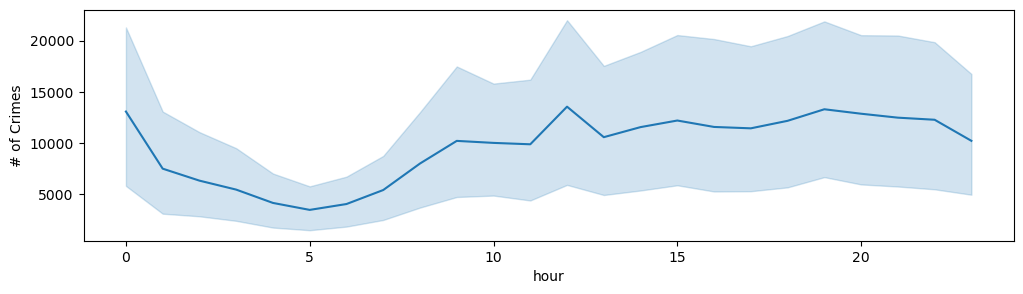

In [34]:
plt.figure(figsize=(12,3));
ax = sns.lineplot(data=plot_df, x='hour',y='# of Crimes')


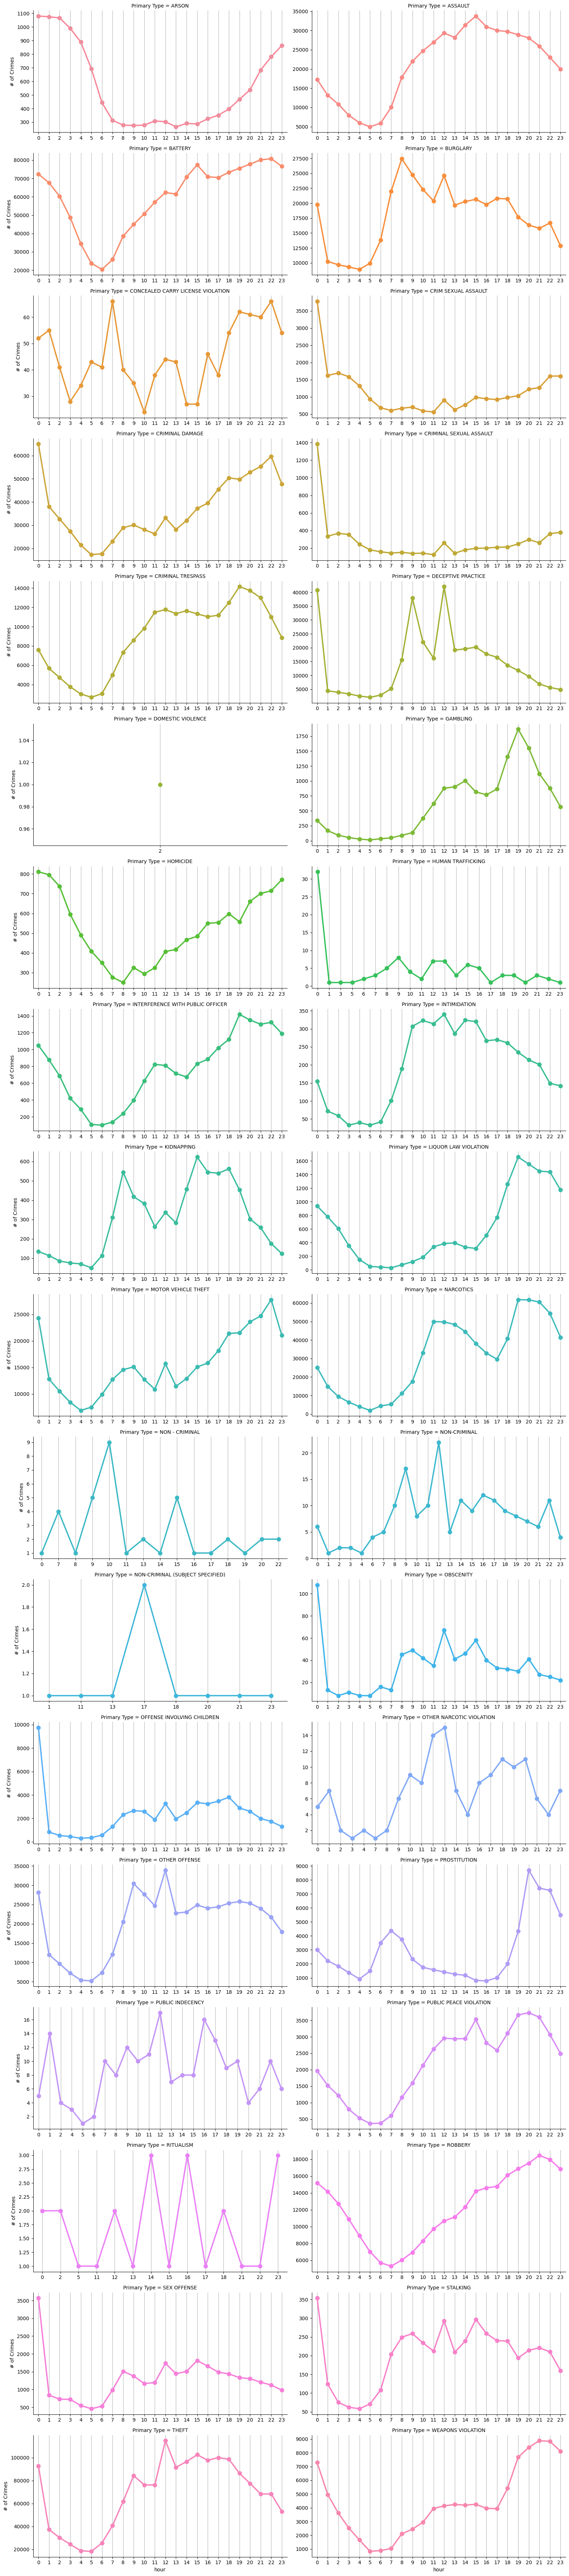

In [37]:
g = sns.catplot(data=plot_df, x='hour', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [39]:
# looping through the value counts series
val_counts_by_hour = eda_df.groupby('Primary Type')['hour'].value_counts()
val_counts_by_hour

Primary Type       hour
ARSON              0       1080
                   1       1075
                   2       1066
                   3        990
                   4        890
                           ... 
WEAPONS VIOLATION  8       2108
                   4       1660
                   7       1043
                   6        893
                   5        831
Name: hour, Length: 800, dtype: int64

In [40]:
crime_list = val_counts_by_hour.index.levels[0]
crime_list

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [41]:
##selecting a test crime and slicing the result
crime='HOMICIDE'
val_counts_by_hour.loc[crime]

hour
0     811
1     796
23    771
2     737
22    715
21    701
20    661
18    598
3     596
19    558
17    554
16    550
4     491
15    484
14    467
13    418
5     408
12    407
6     350
9     326
11    325
10    294
7     277
8     250
Name: hour, dtype: int64

In [42]:
## getting min and max values
val_counts_by_hour.loc[crime].agg(['min','max'])

min    250
max    811
Name: hour, dtype: int64

In [43]:
##  Getting indices for min and max
val_counts_by_hour.loc[crime].agg(['idxmin','idxmax'])

idxmin    8
idxmax    0
Name: hour, dtype: int64

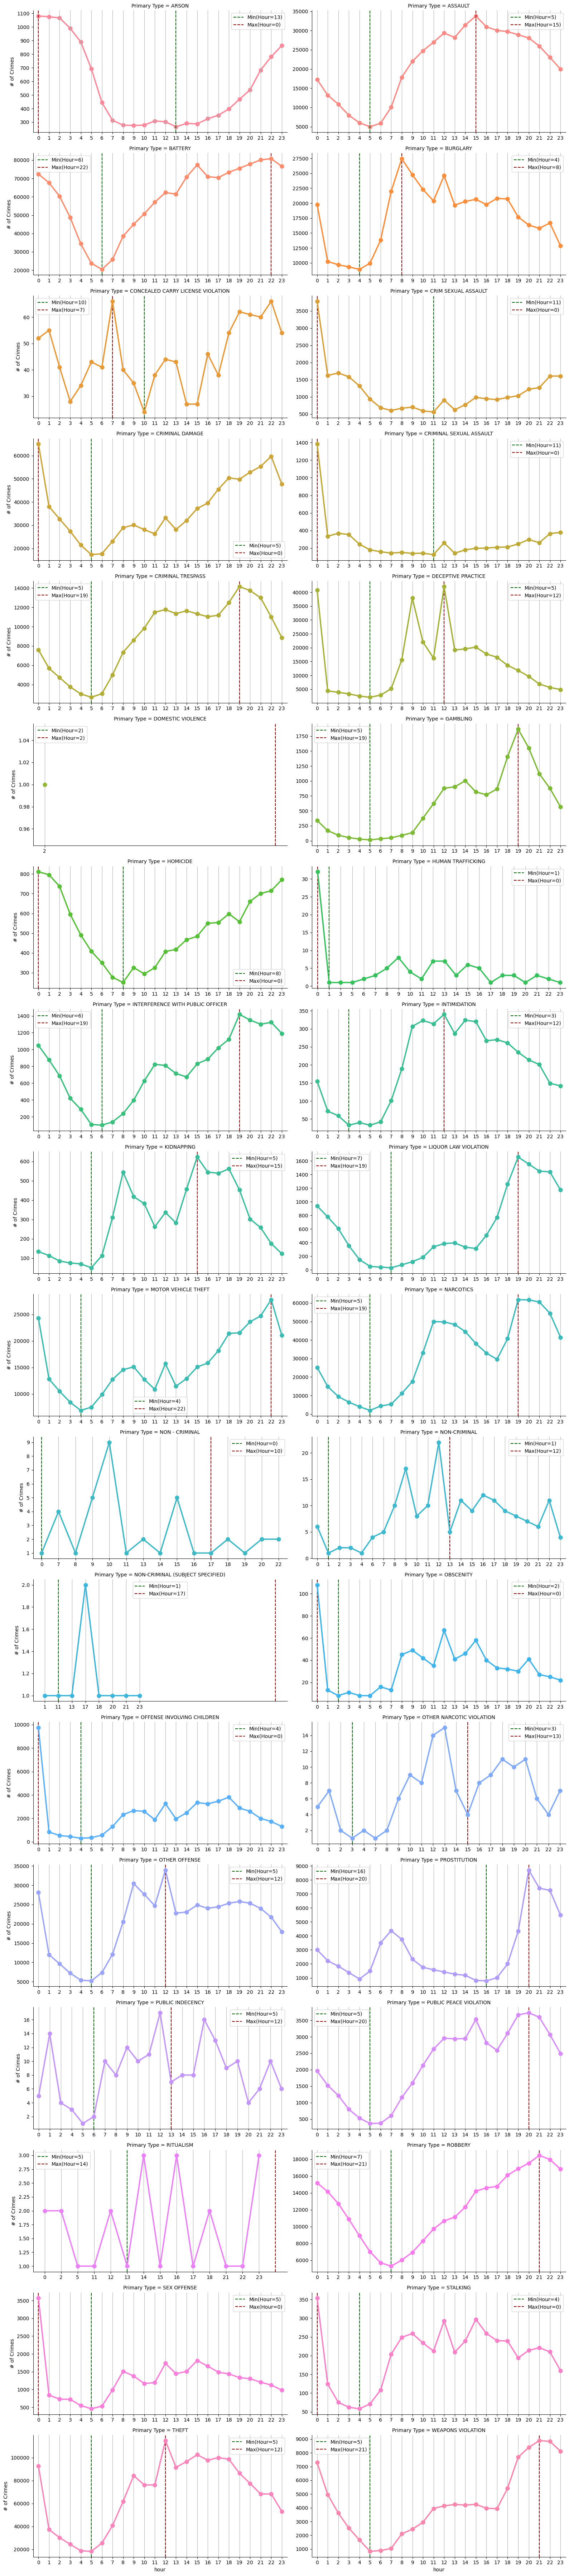

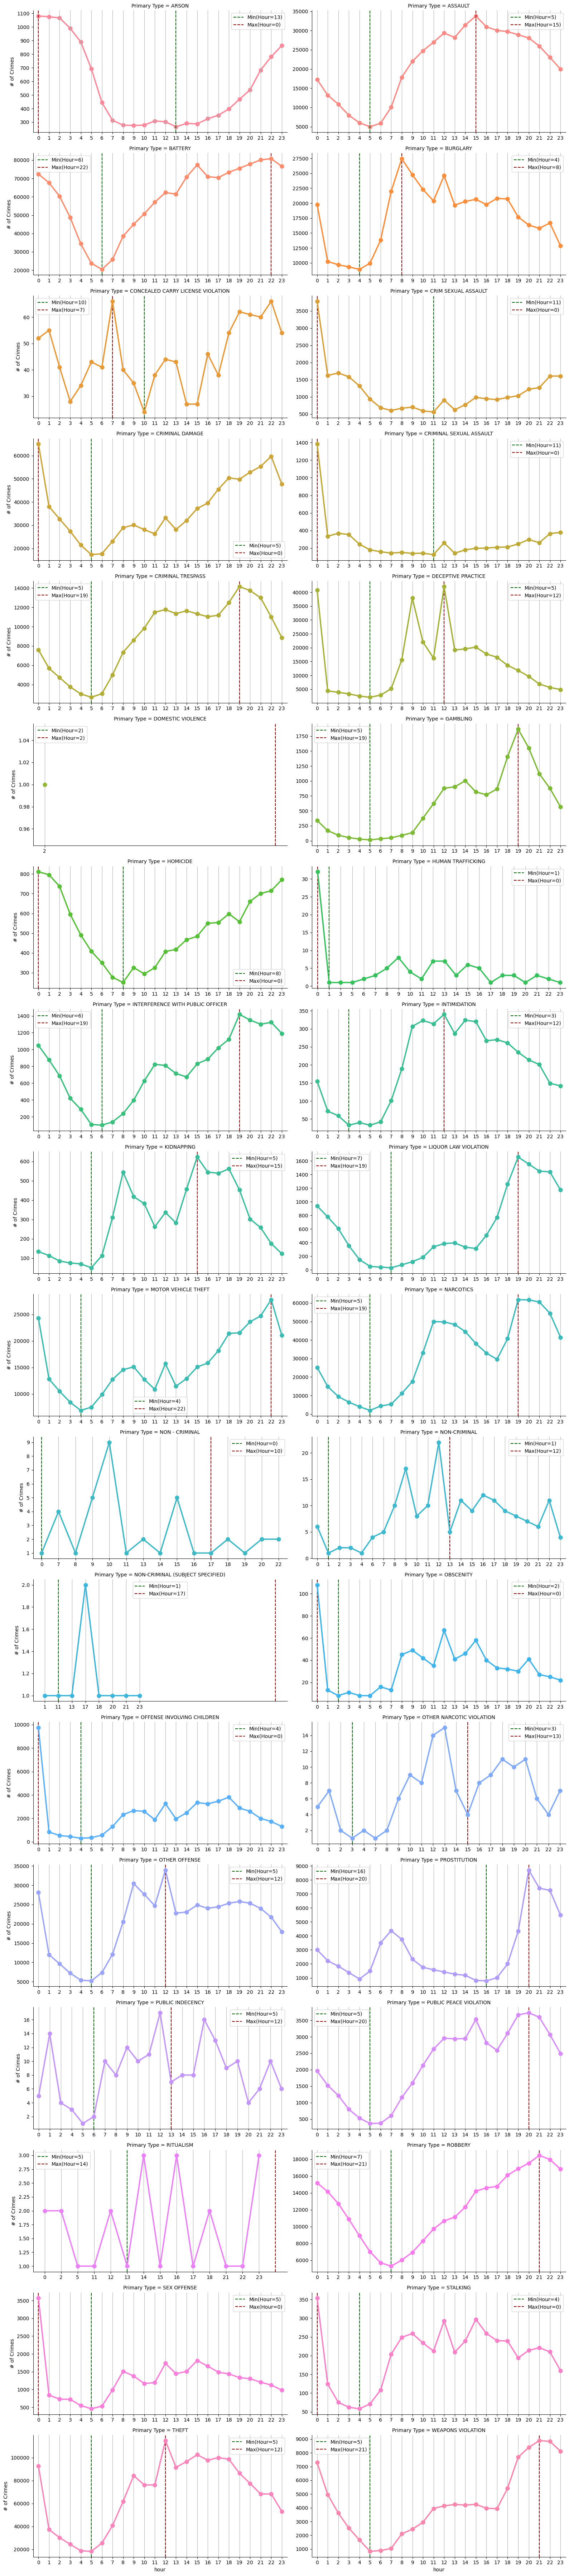

In [45]:
g = sns.catplot(data=plot_df, x='hour', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = val_counts_by_hour.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig


### Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

In [52]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [57]:
## Map the api's .get method onto the df to get all holidays
eda_df['holiday'] = eda_df['Date'].map(us_holidays.get)
eda_df['holiday'].unique()

array(["New Year's Day", None, 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Labor Day', 'Columbus Day', 'Veterans Day',
       'Veterans Day (Observed)', 'Thanksgiving', 'Christmas Day',
       'Independence Day (Observed)', 'Christmas Day (Observed)',
       "New Year's Day (Observed)",
       'Juneteenth National Independence Day (Observed)',
       'Juneteenth National Independence Day'], dtype=object)

In [58]:
eda_df['holiday'].value_counts()

New Year's Day                                     33525
Independence Day                                   22666
Labor Day                                          22156
Memorial Day                                       21123
Columbus Day                                       20915
Veterans Day                                       20416
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18224
Thanksgiving                                       14793
Christmas Day                                      12414
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5519
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1402
Name: holiday, dtype: int64

#### There is an Increase in Crime on New Year's Day and a Decrease on Juneteenth National Independence Day (Observed).

## Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [59]:
crimes_by_months = eda_df.groupby('Primary Type')['month'].value_counts().sort_index()
crimes_by_months

Primary Type       month    
ARSON              April        1119
                   August       1183
                   December      923
                   February      840
                   January       963
                                ... 
WEAPONS VIOLATION  March        8800
                   May          9937
                   November     7951
                   October      9189
                   September    9435
Name: month, Length: 415, dtype: int64

In [61]:
## convert to dataframe and reset_index()
plot_df = crimes_by_months.to_frame('# of Crimes').reset_index()
plot_df

Primary Type      month  # of Crimes
0                ARSON      April         1119
1                ARSON     August         1183
2                ARSON   December          923
3                ARSON   February          840
4                ARSON    January          963
..                 ...        ...          ...
410  WEAPONS VIOLATION      March         8800
411  WEAPONS VIOLATION        May         9937
412  WEAPONS VIOLATION   November         7951
413  WEAPONS VIOLATION    October         9189
414  WEAPONS VIOLATION  September         9435

[415 rows x 3 columns]

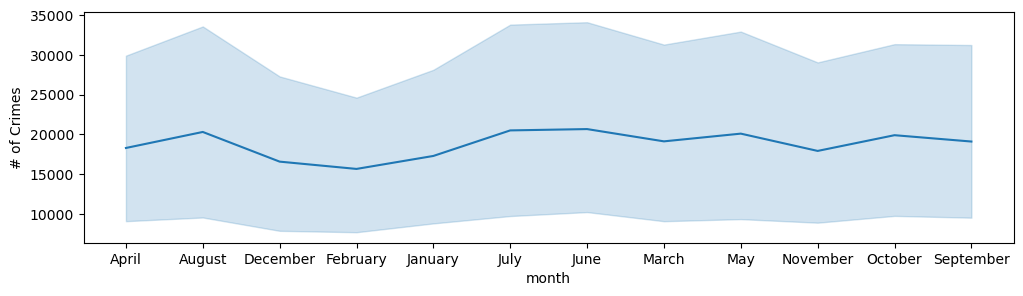

In [62]:
plt.figure(figsize=(12,3));
ax = sns.lineplot(data=plot_df, x='month',y='# of Crimes')

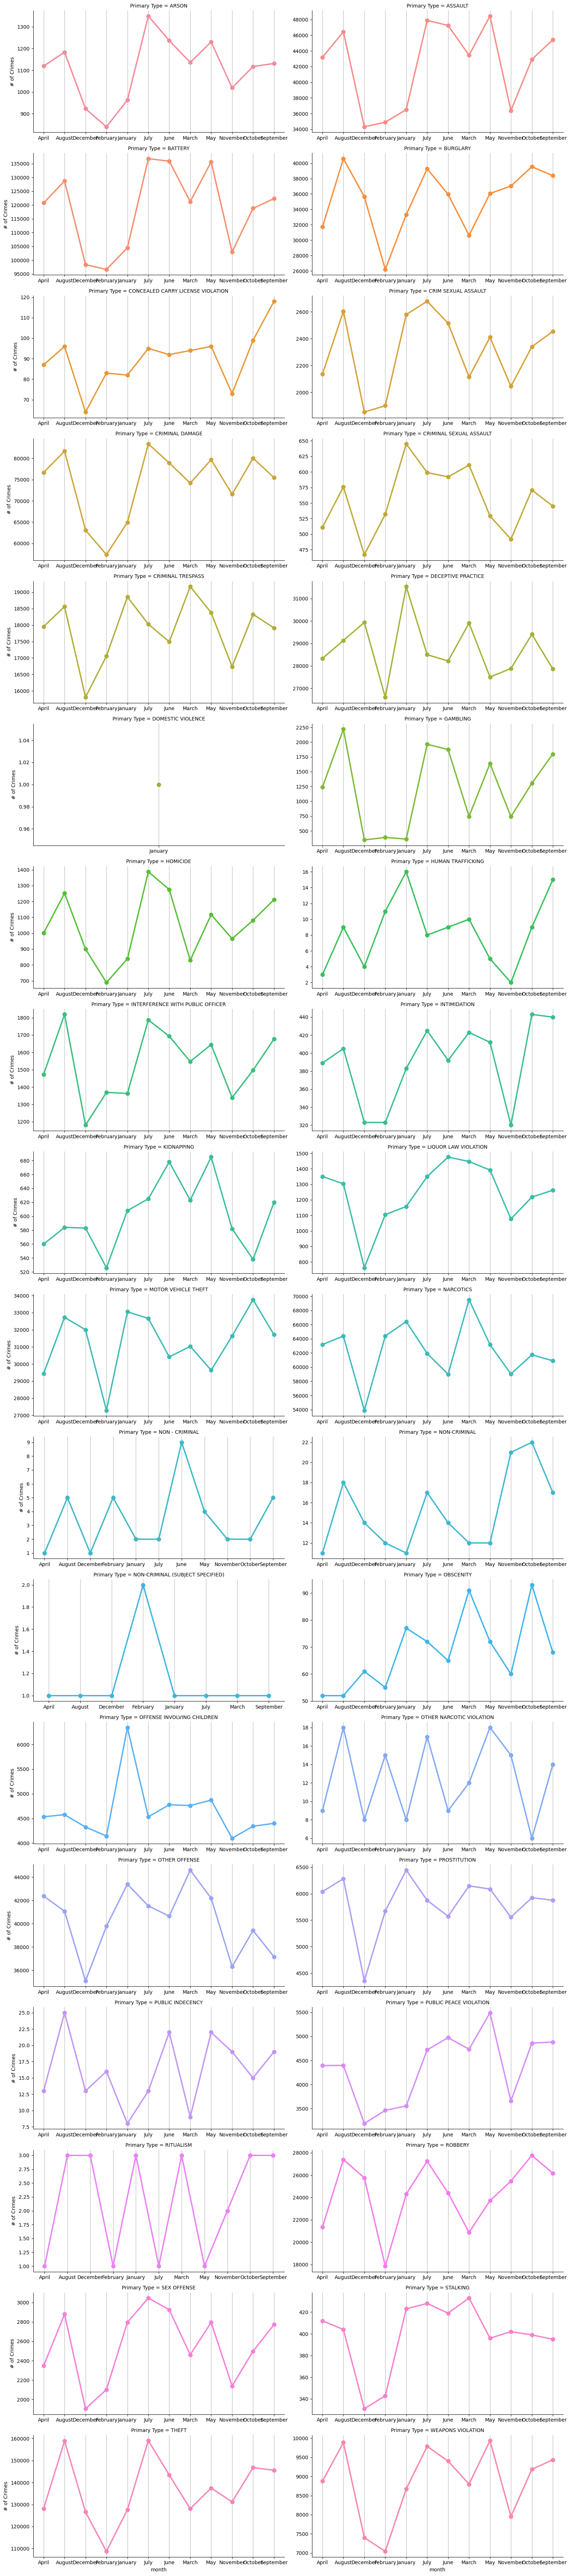

In [63]:
g = sns.catplot(data=plot_df, x='month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [64]:
# looping through the value counts series
val_counts_by_month= eda_df.groupby('Primary Type')['month'].value_counts()
val_counts_by_month

Primary Type       month   
ARSON              July        1349
                   June        1236
                   May         1230
                   August      1183
                   March       1136
                               ... 
WEAPONS VIOLATION  March       8800
                   January     8674
                   November    7951
                   December    7400
                   February    7041
Name: month, Length: 415, dtype: int64

In [65]:
crime_list_2 = val_counts_by_month.index.levels[0]
crime_list_2

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [66]:
##selecting a test crime and slicing the result
month_crime='HOMICIDE'
val_counts_by_month.loc[month_crime]

month
July         1387
June         1275
August       1252
September    1211
May          1117
October      1081
April        1001
November      965
December      900
January       838
March         829
February      689
Name: month, dtype: int64

In [67]:
## getting min and max values
val_counts_by_month.loc[crime].agg(['min','max'])

min     689
max    1387
Name: month, dtype: int64

In [69]:
##  Getting indices for min and max
val_counts_by_month.loc[crime].agg(['idxmin','idxmax'])

idxmin    February
idxmax        July
Name: month, dtype: object

#### July has the most Crime and February has the Least amount of Crime.

### Conceal Carry, Deceptive Practice, Criminal Sexual Assault, Criminal Trespass, Human Trafficking, Kidnapping, and others did not follow the pattern of min and max.